In [ ]:
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from generateXdata import generateX
import os
from sklearn.linear_model import Lasso, LassoCV
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error


In [2]:

filename = os.path.join("dataforfinalproject","RECS_COMBINED_DATA.csv")
dataset=read_csv(filename)

In [3]:
dataset.describe()

,RECSYEAR,DOEID,REGIONC,DIVISION,TYPEHUQ,CELLAR,STORIES,PRKGPLC1,YEARMADE,OCCUPYY,...,WDPELLET,WDOTHER,WDWARM,WDWATER,USESOLAR,SOLWATER,SOLOTHER,TVAUDIOEQUIP,PCOFFEQUIP,PHONE
count,22591.000000,22591.000000,22591.000000,22591.000000,22591.000000,22591.000000,22591.000000,22591.000000,22591.000000,22591.000000,...,22591.000000,22591.000000,22591.000000,22591.000000,22591.000000,22591.000000,22591.000000,22591.000000,22591.000000,22591.000000
mean,2008.802576,7195.131247,2.651498,5.382453,2.638484,0.143199,15.248373,0.475897,4.050640,6.796069,...,0.255544,-1.387411,0.114824,0.001284,0.010579,0.002523,0.006994,6.695720,2.764110,1.534107
std,4.762735,4402.416131,1.045644,2.821670,1.184945,2.250864,20.100299,2.239042,2.246379,1.992055,...,4.179991,0.927600,0.318817,0.035807,0.102313,0.050168,0.083339,3.735064,2.343253,1.120486
min,2001.000000,1.000000,1.000000,1.000000,1.000000,-2.000000,-2.000000,-2.000000,1.000000,1.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,3330.000000,2.000000,3.000000,2.000000,-2.000000,10.000000,0.000000,2.000000,6.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000
50%,2009.000000,6474.000000,3.000000,5.000000,2.000000,0.000000,10.000000,0.000000,4.000000,7.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000,2.000000
75%,2015.000000,11061.000000,3.000000,7.000000,3.000000,1.000000,20.000000,1.000000,6.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,4.000000,2.000000
max,2015.000000,15686.000000,4.000000,10.000000,5.000000,9.000000,99.000000,9.000000,13.000000,9.000000,...,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.000000,23.000000,10.000000


In [4]:
set_option('precision', 2)
dataset.corr(method='spearman')

,RECSYEAR,DOEID,REGIONC,DIVISION,TYPEHUQ,CELLAR,STORIES,PRKGPLC1,YEARMADE,OCCUPYY,...,WDPELLET,WDOTHER,WDWARM,WDWATER,USESOLAR,SOLWATER,SOLOTHER,TVAUDIOEQUIP,PCOFFEQUIP,PHONE
RECSYEAR,1.00e+00,7.24e-01,5.64e-02,7.32e-02,-1.21e-02,-5.00e-01,-2.49e-01,-1.99e-01,2.27e-02,-2.57e-01,...,-6.78e-01,-6.19e-01,-3.65e-02,-7.29e-03,-2.26e-02,-1.68e-02,2.28e-03,2.81e-02,2.32e-01,4.70e-02
DOEID,7.24e-01,1.00e+00,5.00e-02,5.73e-02,-1.23e-02,-3.58e-01,-1.30e-01,-1.03e-01,4.04e-02,-1.38e-01,...,-3.78e-01,-3.44e-01,-1.28e-02,-7.12e-03,-1.08e-02,-8.13e-03,-1.78e-03,1.63e-03,1.55e-01,1.27e-01
REGIONC,5.64e-02,5.00e-02,1.00e+00,9.70e-01,-6.03e-02,-3.04e-01,-1.09e-01,4.58e-02,2.02e-01,1.59e-02,...,-3.22e-02,-2.45e-02,1.54e-02,-2.85e-02,4.36e-02,4.07e-02,3.24e-02,-3.49e-03,3.24e-02,-8.78e-03
DIVISION,7.32e-02,5.73e-02,9.70e-01,1.00e+00,-5.64e-02,-3.23e-01,-1.29e-01,3.59e-02,1.80e-01,8.72e-03,...,-5.65e-02,-4.74e-02,9.36e-03,-2.58e-02,3.62e-02,3.60e-02,2.78e-02,-6.94e-03,3.07e-02,-1.84e-02
TYPEHUQ,-1.21e-02,-1.23e-02,-6.03e-02,-5.64e-02,1.00e+00,-1.93e-01,-3.55e-01,-3.02e-01,-6.82e-02,1.11e-01,...,-6.32e-02,-8.83e-02,-1.55e-01,-2.04e-02,-3.62e-02,-8.48e-03,-3.73e-02,-2.38e-01,-1.59e-01,-1.65e-01
CELLAR,-5.00e-01,-3.58e-01,-3.04e-01,-3.23e-01,-1.93e-01,1.00e+00,5.64e-01,4.08e-01,-1.27e-01,-1.63e-02,...,3.89e-01,3.66e-01,7.65e-02,2.45e-02,1.27e-02,-1.72e-04,7.14e-03,1.35e-01,1.98e-02,7.63e-02
STORIES,-2.49e-01,-1.30e-01,-1.09e-01,-1.29e-01,-3.55e-01,5.64e-01,1.00e+00,6.11e-01,6.46e-02,-6.73e-02,...,3.38e-01,3.23e-01,9.59e-02,1.64e-02,3.38e-02,1.67e-02,2.36e-02,2.06e-01,1.49e-01,2.11e-01
PRKGPLC1,-1.99e-01,-1.03e-01,4.58e-02,3.59e-02,-3.02e-01,4.08e-01,6.11e-01,1.00e+00,2.24e-01,-9.07e-02,...,2.90e-01,2.79e-01,8.70e-02,5.53e-03,4.32e-02,1.66e-02,3.75e-02,2.18e-01,1.81e-01,2.27e-01
YEARMADE,2.27e-02,4.04e-02,2.02e-01,1.80e-01,-6.82e-02,-1.27e-01,6.46e-02,2.24e-01,1.00e+00,1.22e-01,...,3.95e-02,3.71e-02,1.15e-02,1.98e-03,1.38e-02,1.34e-02,8.72e-03,1.30e-01,1.22e-01,1.21e-01
OCCUPYY,-2.57e-01,-1.38e-01,1.59e-02,8.72e-03,1.11e-01,-1.63e-02,-6.73e-02,-9.07e-02,1.22e-01,1.00e+00,...,2.45e-01,2.17e-01,-1.42e-02,3.90e-03,-1.06e-02,3.70e-03,-3.16e-02,-6.22e-02,-1.09e-01,-1.58e-02


In [5]:
cost=dataset['TOTALDOLLAR']

energy_exp= dataset['TOTALBTU']

In [6]:
features,columns=generateX(True,'DOLLAR')

 X Features shape : (22591, 87)
cols with values as 99 and -2: ['CELLAR', 'STORIES', 'PRKGPLC1', 'BEDROOMS', 'FUELPOOL', 'SIZRFRI1', 'TYPERFR1', 'AGERFRI1', 'SIZRFRI2', 'TYPERFR2', 'AGERFRI2', 'NUMFREEZ', 'SIZFREEZ', 'AGEFRZR', 'STOVENFUEL', 'OVENUSE', 'AMTMICRO', 'DWASHUSE', 'WASHLOAD', 'WASHTEMP', 'EQUIPM', 'FUELHEAT', 'EQUIPAGE', 'PROTHERM', 'TEMPHOME', 'TEMPGONE', 'TEMPNITE', 'AGECENAC', 'USECENAC', 'NUMBERAC', 'WWACAGE', 'USEWWAC', 'FUELH2O', 'WHEATAGE', 'WHEATSIZ', 'LGTOUTNUM', 'ESDISHW', 'PGASHEAT', 'WOODAMT'] 

Duplicate Count : 0
shape of X is (22591, 86)


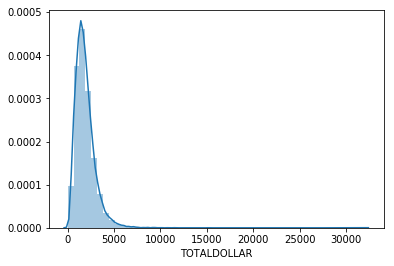

In [7]:
sns.distplot(dataset['TOTALDOLLAR']);

In [8]:
X=features

In [9]:
y = dataset['TOTALDOLLAR'].values.reshape(-1, 1)
#y =dataset['TOTALBTU'].values.reshape(-1, 1)

In [10]:
print(X.shape, y.shape)


(22591, 86) (22591, 1)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22,random_state=42)

In [113]:
def linearmodel(X_train,y_train,X_test,y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions=model.predict(X_test)
    plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
    plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
    plt.legend()
    plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
    plt.title("Residual Plot")
    plt.show()
    RMSE = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = model.score(X_test, y_test)
    column_series = list(predictedY)
    df_modelresults=pd.DataFrame()
    df_modelresults = df_modelresults.assign(LinearPredictedY=column_series)
    print(f"MSE: {MSE}, R2: {r2}")
    return(df_modelresults, RMSE, r2)

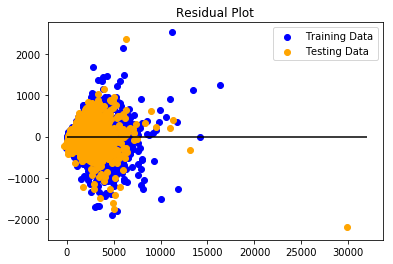

MSE: 199.8346713643192, R2: 0.9692037817276707


In [115]:
Linear_Predicted,RMSE,r2=linearmodel(X_train,y_train,X_test,y_test)

In [133]:
def classic_lasso_model(X_train,y_train, X_test,y_test):
    lasso = Lasso(alpha=0.01).fit(X_train, y_train)
    predictions_train = lasso.predict(X_train)
    RMSE_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    r2_train = lasso.score(X_train, y_train)
    predictions = lasso.predict(X_test)
    RMSE_test = np.sqrt(mean_squared_error(y_test, predictions))
    r2_test= lasso.score(X_test, y_test)
    df_modelresults=pd.DataFrame(predictions,columns=['Classic_Lasso_predicted'])
    print(f"RMSE_classic_Lasso={RMSE_test},R2_Classic_Lasso={r2_test}")
    return(df_modelresults, RMSE_test,r2_test)

In [134]:
classic_lasso_predicted,RMSE_lasso,R2_Lasso=classic_lasso_model(X_train,y_train, X_test,y_test)

RMSE_classic_Lasso=200.1943407662223,R2_Classic_Lasso=0.9690928257536336


In [141]:
def lasso_CV(X,y,test_size,seed):
    X_train, X_test , y_train, y_test = cross_validation.train_test_split(X, y, test_size=test_size, random_state=seed)
    lasso = Lasso(max_iter=10000, normalize=True)
    lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
    lassocv.fit(X_train, y_train)
    lasso.set_params(alpha=lassocv.alpha_)
    print("Alpha=", lassocv.alpha_)
    lasso.fit(X_train, y_train)
    print("best model coefficients:")
    pd.Series(lasso.coef_)
    predictions = lasso.predict(X_test)
    RMSE_test = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = lasso.score(X_test, y_test)
    print(f"RMSE_Lasso_CV: {RMSE_test}, R2_Lasso_CV: {r2}")
    df_modelresults=pd.DataFrame(predictions,columns=['Lasso_CV_predicted'])
    return(df_modelresults,RMSE_test,r2)

In [142]:
Lasso_CV_predicted,RMSE_lasso_CV,R2_Lasso_CV=lasso_CV(X,y,0.2,42)

Alpha= 0.006547622035708039
best model coefficients:
RMSE_Lasso_CV: 199.4219403977799, R2_Lasso_CV: 0.9694253523704928


In [60]:
model = Lasso()
alpha=np.arange(0.0,0.05,.003)
print(alpha)

[0.    0.003 0.006 0.009 0.012 0.015 0.018 0.021 0.024 0.027 0.03  0.033
 0.036 0.039 0.042 0.045 0.048]


In [61]:
param_grid = [{'alpha':alpha}]
pricing_grid  = GridSearchCV(model, param_grid, cv=5,scoring='r2')
pricing_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([0.   , 0.003, 0.006, 0.009, 0.012, 0.015, 0.018, 0.021, 0.024,
       0.027, 0.03 , 0.033, 0.036, 0.039, 0.042, 0.045, 0.048])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [62]:
pricing_grid.best_estimator_

Lasso(alpha=0.048, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
test_scores = pricing_grid.cv_results_
test_scores

{'mean_fit_time': array([2.47148924, 2.41911545, 2.43768907, 2.4395052 , 2.42307768,
        2.47311673, 2.44483075, 2.40899887, 2.4452312 , 2.45993705,
        2.39869852, 2.40894938, 2.49632206, 2.43246369, 2.43106623,
        2.67298679, 2.4451086 ]),
 'std_fit_time': array([0.14257311, 0.08705859, 0.1290342 , 0.09925854, 0.07727568,
        0.19010875, 0.138044  , 0.10860083, 0.13592364, 0.20235786,
        0.1279269 , 0.12010531, 0.17482408, 0.12702435, 0.12360233,
        0.16516727, 0.11021911]),
 'mean_score_time': array([0.00099497, 0.00096741, 0.00059876, 0.00113211, 0.00076566,
        0.00098009, 0.00076742, 0.00099783, 0.00095139, 0.00110464,
        0.00099072, 0.00097437, 0.00104833, 0.0009882 , 0.00113115,
        0.00119739, 0.00079021]),
 'std_score_time': array([6.23253710e-06, 2.60854769e-05, 4.88889132e-04, 2.69723966e-04,
        3.85420003e-04, 2.21759527e-05, 3.84497500e-04, 7.44843452e-07,
        5.89823857e-05, 3.02017281e-04, 1.50710719e-05, 4.61233420e-05,


In [64]:
print(pricing_grid.best_score_)

0.9636647633806548


In [65]:
predictions = pricing_grid.predict(X_test)

In [66]:
predictions

array([ 711.96853017, 5442.43138906, 3763.91894635, ..., 2824.16827007,
       1649.20992642,  796.84231635])

In [67]:
y_test

array([[ 724.],
       [5529.],
       [4314.],
       ...,
       [2727.],
       [1430.],
       [ 981.]])

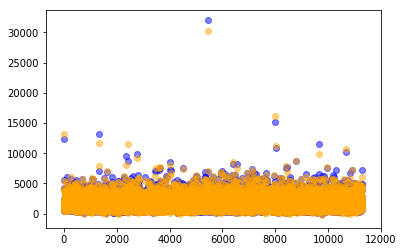

In [68]:
plt.scatter(range(len(predictions)), y_test, c="blue", marker='o',label="Actual Price",alpha=0.5)
plt.scatter(range(len(predictions)), predictions, c="orange",marker='o', label="Predicted Price",alpha=0.5)

In [ ]:
alpha=np.arange(0.0,0.05,.003)
print(alpha)
enet = ElasticNet()
param_grid = [{'alpha':alpha}]
enet_grid  = GridSearchCV(enet, param_grid, cv=5)
enet_grid.fit(X_train, y_train)
predictions = enet_grid.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = enet_grid.score(X_test, y_test)
#grid_results = pd.DataFrame(enet_grid.cv_results_) 
print(predictions)
print(f" R2_Lasso_CV: {r2, MSE}")

[0.    0.003 0.006 0.009 0.012 0.015 0.018 0.021 0.024 0.027 0.03  0.033
 0.036 0.039 0.042 0.045 0.048]


In [23]:
       
# best_idx =enet_grid.best_index_

# cv_mean = abs(grid_results.loc[best_idx,'mean_test_score'])
# cv_std = grid_results.loc[best_idx,'std_test_score']
#RMSE = np.sqrt(mean_squared_error(y_test, predictions))
MSE = mean_squared_error(y_test, predictions)
r2 = enet_grid.score(X_test, y_test)
print(f" R2_Lasso_CV: {cv_mean, cv_std}")

[0.    0.003 0.006 0.009 0.012 0.015 0.018 0.021 0.024 0.027 0.03  0.033
 0.036 0.039 0.042 0.045 0.048]


KeyboardInterrupt: 